In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2]])

In [3]:
X

array([[ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  1,  2,  1,  3,  0,  5, 10,  1,  2]])

In [4]:
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]

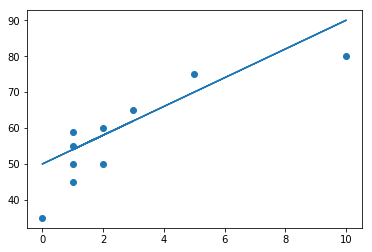

In [5]:
plt.scatter(X[1,:], y)
plt.plot(X[1,:], 50 + 4*X[1,:])

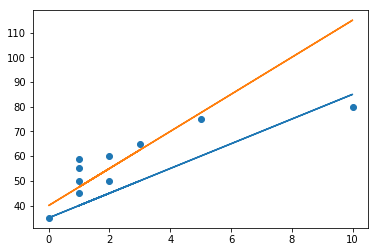

In [6]:
plt.scatter(X[1], y)
plt.plot(X[1], 35*np.ones(10) + X[1]*5)
plt.plot(X[1], 40*np.ones(10) + X[1]*7.5)

In [7]:
y_pred1 = 35*np.ones(10) + X[1]*5
y_pred2 = 40*np.ones(10) + X[1]*7.5

In [8]:
y_pred2

array([ 47.5,  47.5,  55. ,  47.5,  62.5,  40. ,  77.5, 115. ,  47.5,
        55. ])

In [9]:
err1 = np.mean(y - y_pred1)
err2 = np.mean(y - y_pred2)

In [10]:
err1, err2

(9.4, -2.1)

In [11]:
mae_1 = np.mean(np.abs(y - y_pred1))
mae_2 = np.mean(np.abs(y - y_pred2))

In [12]:
mae_1, mae_2

(10.4, 7.9)

In [13]:
mse_1 = np.mean((y - y_pred1)**2)
mse_2 = np.mean((y - y_pred2)**2)

In [14]:
mse_1, mse_2

(143.6, 151.35)

Метод наименьших квадратов

In [15]:
X.shape

(2, 10)

In [16]:
X.T.shape

(10, 2)

In [17]:
W = np.linalg.inv(np.dot(X, X.T)) @ X @ y
W

array([47.23214286,  3.91071429])

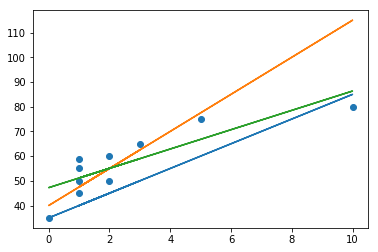

In [18]:
plt.scatter(X[1], y)
plt.plot(X[1], 35*np.ones(10) + X[1]*5)
plt.plot(X[1], 40*np.ones(10) + X[1]*7.5)
plt.plot(X[1], W[0] + W[1] * X[1])

In [19]:
def calc_mse(y, y_pred):
  err = np.mean((y - y_pred)**2)
  return err

In [20]:
calc_mse(y, y_pred1)

143.6

In [21]:
def calc_mae(y, y_pred):
  err = np.mean(np.abs(y - y_pred))
  return err

In [22]:
calc_mae(y, y_pred1)

10.4

In [23]:
y_pred3 = W[0] + W[1] * X[1]
y_pred3

array([51.14285714, 51.14285714, 55.05357143, 51.14285714, 58.96428571,
       47.23214286, 66.78571429, 86.33928571, 51.14285714, 55.05357143])

In [24]:
calc_mse(y, y_pred3)

45.93750000000002

In [25]:
calc_mae(y, y_pred3)

6.182142857142859

Градиентный спуск

In [26]:
n = 10
f = 1/n * np.sum((W[0] * X[0] - y)**2)

In [27]:
alpha = 1e-8
g = alpha * (1/n * 2 * np.sum(X[0] * (W[0] * X[0] - y)))

In [28]:
W[0] - g


47.2321430605

1. Подберите скорость обучения (alpha) и количество итераций:

In [57]:
n = X.shape[1]
alpha = 1e-3
W = np.array([1, 0.5])
W, alpha

(array([1. , 0.5]), 0.001)

In [56]:
for i in range(15000):
  y_pred = np.dot(W, X)
  err = calc_mse(y, y_pred)
  for ii in range(W.shape[0]):
    W[ii] -= alpha * (1/n * 2 * np.sum(X[ii] * (y_pred - y)))
  if i % 1000 == 0:
    print(i, W, err)

0 [1.1102 0.84  ] 3173.15
1000 [31.66648131  6.78503276] 176.46806566379882
2000 [41.73215361  4.92632937] 62.2342399245102
3000 [45.28877016  4.26957292] 47.97214782992787
4000 [46.54546925  4.03751382] 46.19152576288303
5000 [46.98951279  3.95551778] 45.96921511416331
6000 [47.14641166  3.92654521] 45.94145963171208
7000 [47.2018505  3.916308 ] 45.93799435998288
8000 [47.22143932  3.91269078] 45.937561720839334
9000 [47.22836086  3.91141266] 45.93750770584623
10000 [47.23080652  3.91096105] 45.93750096207482
11000 [47.23167067  3.91080148] 45.93750012011503
12000 [47.23197602  3.91074509] 45.937500014996345
13000 [47.23208391  3.91072517] 45.9375000018723
14000 [47.23212203  3.91071813] 45.93750000023376


*2. В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее:

In [58]:
for i in range(30001):
  y_pred = np.dot(W, X)
  err = calc_mse(y, y_pred)
  '''for ii in range(W.shape[0]):
    W[ii] -= alpha * (1/n * 2 * np.sum(X[ii] * (y_pred - y)))'''
  W -= (alpha * (1/n * 2 * np.sum(X * (y_pred - y), axis=1)))
  if i % 10000 == 0:
    print(i, W, err)

0 [1.1102 0.84  ] 3173.15
10000 [47.23080652  3.91096105] 45.93750096207482
20000 [47.23214282  3.91071429] 45.937499999999986
30000 [47.23214286  3.91071429] 45.93749999999998
